## Data wrangling



## Table of Contents
- [Introduction](#1)
- [Gathering data](#2)
- [Assessing data](#3)
- [Quality Issues](#4)
- [Tidiness](#5)
- [Cleaning data](#6)
- [Storing, Analyzing, and Visualizing](#7)
- [References](#22)

<a id='1'></a>
### Introduction


Real-world data is messy So, in this project I will put in practice what I learned in data wrangling. The dataset that is wrangled is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.

In [1]:
#Import all packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import os
import requests
import tweepy 
import json
import re
import datetime
%matplotlib inline
import matplotlib.pyplot as plt

<a id='2'></a>
### Gathering 
1- The WeRateDogs Twitter archive (File on hand):

In [2]:
# Load the enhanced twitter archive file.
twitter_df = pd.read_csv('twitter-archive-enhanced-2.csv')

2- Twitter API from Json
 
I have not received authoraization from twitter so I will read the json file that given on the classroom.

### load the data Tweeter API

CONSUMER_KEY = "XXX"

CONSUMER_SECRET = "XXX"

ACCESS_TOKEN = "XXX"

ACCESS_TOKEN_SECRET = "XXX"

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)

auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth_handler = auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [3]:
# load the tweet json text file
tweet = pd.read_json('tweet-json.txt', lines=True)

3-The tweet image predictions

In [4]:
# Scrape the image predictions file.
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(file='image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
# Load the image predictions file
image_predictions = pd.read_table('image-predictions.tsv')

In [6]:
# Copying the Dataframes 
twitter_df_clean = twitter_df.copy()
images_clean = image_predictions.copy()
tweet_clean = tweet.copy()

<a id='3'></a>
### Assessing 
Now I'll assess the data visually and programmatically for quality and tidiness issues.

In [7]:
# here display a sample data from twitter_df_clean
twitter_df_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1410,699036661657767936,NaN,NaN,2016-02-15 01:05:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",HAPPY V-DAY FROM YOUR FAV PUPPER SQUAD 13/10 f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699036661...,13,10,None,None,None,pupper,None
2107,670465786746662913,NaN,NaN,2015-11-28 04:54:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Silly dog here. Wearing bunny ears. Nice long ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670465786...,7,10,None,None,None,None,None
2270,667502640335572993,NaN,NaN,2015-11-20 00:40:05 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Say hello to Hall and Oates. Oates is winking ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667502640...,11,10,Hall,None,None,None,None
190,855857698524602368,NaN,NaN,2017-04-22 18:55:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...","HE'S LIKE ""WAIT A MINUTE I'M AN ANIMAL THIS IS...",NaN,NaN,NaN,https://twitter.com/perfy/status/8558573181681...,13,10,None,None,None,None,None
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679111216...,12,10,officially,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
829,768909767477751808,NaN,NaN,2016-08-25 20:35:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: When it's Janet from accounting...,7.001438e+17,4.196984e+09,2016-02-18 02:24:13 +0000,https://twitter.com/dog_rates/status/700143752...,10,10,None,None,None,pupper,None
99,872967104147763200,NaN,NaN,2017-06-09 00:02:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/872967104...,12,10,None,doggo,None,None,None
2244,667886921285246976,NaN,NaN,2015-11-21 02:07:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Erik. He's fucken massive. But also ki...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667886921...,11,10,Erik,None,None,None,None
923,755955933503782912,NaN,NaN,2016-07-21 02:41:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a frustrated pupper attempting to escap...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/755955933...,12,10,None,None,None,pupper,None


In [8]:
# display twitter_df info
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# display twitter_df describe
twitter_df_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
# display unique column rating_denominator from twitter_df 
twitter_df_clean.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [11]:
# display sample data from image_predictions
images_clean.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
2013,879376492567855104,https://pbs.twimg.com/media/DDQsQGFV0AAw6u9.jpg,1,tricycle,0.663601,False,Labrador_retriever,0.033496,True,Pembroke,0.018827,True
1918,855459453768019968,https://pbs.twimg.com/media/C98z1ZAXsAEIFFn.jpg,2,Blenheim_spaniel,0.389513,True,Pekinese,0.188220,True,Japanese_spaniel,0.082628,True
643,681523177663676416,https://pbs.twimg.com/media/CXVBtX_WwAEuqbP.jpg,1,Norfolk_terrier,0.205067,True,German_shepherd,0.160439,True,chow,0.156234,True
1981,871515927908634625,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,2,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False
1212,743210557239623680,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,golden_retriever,0.930705,True,Chesapeake_Bay_retriever,0.025934,True,Labrador_retriever,0.007535,True
261,670786190031921152,https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg,1,dingo,0.777124,False,Pembroke,0.127438,True,Cardigan,0.024007,True
1600,799757965289017345,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,1,Border_collie,0.442534,True,collie,0.288684,True,Shetland_sheepdog,0.196399,True
1835,837012587749474308,https://pbs.twimg.com/media/C52pYJXWgAA2BEf.jpg,1,toilet_tissue,0.186387,False,cowboy_hat,0.158555,False,sombrero,0.149470,False
1511,786233965241827333,https://pbs.twimg.com/media/CulDnZpWcAAGbZ-.jpg,1,Labrador_retriever,0.478193,True,schipperke,0.224817,True,Staffordshire_bullterrier,0.077396,True


In [12]:
# display image_predictions info
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# display duplicated from column jpg_url in image_predictions
sum(images_clean.jpg_url.duplicated())

66

In [14]:
# display image_predictions describe
images_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
# display sample data from tweet
tweet_clean.sample(10)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1457,2016-02-04 02:00:27+00:00,695064344191721472,695064344191721472,This may be the greatest video I've ever been ...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 695064251149508610, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1771,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
749,2016-09-23 01:00:13+00:00,779123168116150273,779123168116150272,This is Reggie. He hugs everyone he meets. 12/...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 779123157194174464, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,13206,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1917,2015-12-08 16:47:50+00:00,674269164442398721,674269164442398720,This is Bob. He's a Juniper Fitzsimmons. His b...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674269159417585664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,961,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1634,2016-01-05 02:30:55+00:00,684200372118904832,684200372118904832,Gang of fearless hoofed puppers here. Straight...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 684200328540098561, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2394,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1496,2016-01-27 18:42:06+00:00,692417313023332352,692417313023332352,Meet Herschel. He's slightly bigger than ur av...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 692417305561686016, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,10275,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
839,2016-08-20 05:08:29+00:00,766864461642756096,766864461642756096,RT @dog_rates: We only rate dogs... this is a ...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Mon Aug 01 01:28:46 +0000 2016...,NaN,NaN,NaN
317,2017-02-23 01:22:14+00:00,834574053763584002,834574053763584000,Here's a doggo fully pupared for a shower. H*c...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 834574036302757888, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,14993,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
922,2016-07-19 01:04:16+00:00,755206590534418437,755206590534418432,This is one of the most inspirational stories ...,False,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 755206499077615616, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,18212,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2212,2015-11-22 21:41:02+00:00,668544745690562560,668544745690562560,It is an honor to rate this pup. He is a Snork...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668544740393136128, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,561,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2006,2015-12-03 03:30:19+00:00,672256522047614977,672256522047614976,Mighty rare dogs here. Long smooth necks. Grea...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672256514942439426, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2999,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [16]:
# display tweet info
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [17]:
# display tweet describe
tweet_clean.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


<a id='4'></a>
#### Quality Issues

twitter_df_clean:


- [1-Delete retweeted tweets rows because they are not original tweet.](#8)

- [2-remove columns that are not needed for analysis.](#9)

- [3-Change timestamp from string to date time.](#10)

- [4-rating denominator column has numbers like (170,150,130) I think they are typo mistakes because the denominator has to be 10 and Rating numerator that having more than 10 will be decraesed to 10 and values less than 10 will not be changed.](#11)

- [5-Extract texts from source column.](#12)

images_clean:

- [6-capitalize the first letter of p1,p2 and p3 because they have inconsistent capital words.](#13)

- [7-drop duplicate jpg_url.](#14)

- [8-Replace _ and - with white space in p1,p2 and p3 column.](#15)

tweet_clean:

- [9-rename id to tweet_id to merge column.](#16)

- [10-changing tweet_id column from number to string.](#17)

- [11-remove all columns except ('id' , 'retweet_count' , 'favorite_count')](#18)

<a id='5'></a>
#### Tidiness



- [1-combining dog stages to one column.](#19)

- [2-create Date and time column to change from object(string) to date time format.](#20)

- [3-perform inner merge join between three data frame as they all have data for same tweet.](#21)



<a id='6'></a>
### Cleaning 

<a id='8'></a>
**Quality 1.**

**Define:** Delete retweeted tweets rows.

**Code:**


In [18]:
# check before reomve retweet from dataframe
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
# removing retweet from dataframe
twitter_df_clean.drop(twitter_df_clean[twitter_df_clean['retweeted_status_id'].notnull()== True].index, inplace= True)
twitter_df_clean.shape[0]

2175

In [20]:
#Dropping  columns with retweet infomation
twitter_df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1 , inplace= True)

**Test:**

In [21]:
# check the droping columns
twitter_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [22]:
# check after removing tweet
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

<a id='9'></a>
**Quality 2.**

**Define:** remove columns that are not needed for analysis

**Code:**

In [23]:
# droping columns
twitter_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

**Test:**

In [24]:
# checking if columns are removed
twitter_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

<a id='10'></a>
**Quality 3.**

**Define:** Change timestamp from string to date time.

**Code:**

In [25]:
# convert the column from strings to DateTime objects
twitter_df_clean['timestamp'] = pd.to_datetime(twitter_df_clean['timestamp'])

**Test:**

In [26]:
# checking if datatype change
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   int64              
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2175 non-null   int64              
 6   rating_denominator  2175 non-null   int64              
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   object             
 9   floofer             2175 non-null   object             
 10  pupper              2175 non-null   object             
 11  puppo               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

<a id='11'></a>
**Quality 4.**

**Define:** rating denominator column has numbers (170,150,130,120,110 ...) needs to be fixed and rating numerator column has values greater then 10 will be change to be 10.

**Code:**

In [27]:
# replace the values of rating_denominator
twitter_df_clean.rating_denominator = twitter_df_clean.rating_denominator.replace(
    [170, 150,130, 120,110,90,80,70,50,40,20,16,15,11,7,2,0], [10, 10, 10, 10,10,10,10,10,10,10,10,10,10,10,10,10,10])

In [28]:
twitter_df_clean['rating_numerator'] = np.where((twitter_df_clean.rating_numerator >10), 10 ,
                                                      twitter_df_clean.rating_numerator)

**Test:**

In [29]:
# check if value has been change
twitter_df_clean[twitter_df_clean.rating_denominator == 170]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
#check the value count
twitter_df_clean.rating_denominator.value_counts()

10    2175
Name: rating_denominator, dtype: int64

In [31]:
#check the value count
twitter_df_clean.rating_numerator.value_counts()

10    1744
9      156
8       98
7       54
5       36
6       32
3       19
4       17
2        9
1        8
0        2
Name: rating_numerator, dtype: int64

<a id='12'></a>
**Quality 5.**

**Define:** Extract text from source column .

**Code:**

In [32]:
# extract text from source column
twitter_df_clean.source= twitter_df_clean.source.str.extract(r'>\s*([^\.]*)\s*\<', expand=False)

**Test:**

In [33]:
# check if its ectract
twitter_df_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

<a id='13'></a>
**Quality 6.**

**Define:** capitalize the first letter of p1,p2 and p3 .

**Code:**

In [34]:
# capitalize first letter
images_clean['p1'] = images_clean['p1'].str.capitalize()
images_clean['p2'] = images_clean['p2'].str.capitalize()
images_clean['p3'] = images_clean['p3'].str.capitalize()

**Test:**

In [35]:
# check if first letter capitalize
images_clean.p1

0       Welsh_springer_spaniel
1                      Redbone
2              German_shepherd
3          Rhodesian_ridgeback
4           Miniature_pinscher
                 ...          
2070                    Basset
2071               Paper_towel
2072                 Chihuahua
2073                 Chihuahua
2074                    Orange
Name: p1, Length: 2075, dtype: object

<a id='14'></a>
**Quality 7.**

**Define:** Drop duplicate jpg_url.

**Code:**

In [36]:
# dropping duplicates jpg_url
images_clean = images_clean.drop_duplicates(subset=['jpg_url'], keep='last')

**Test:**

In [37]:
# testing if there is duplicates
sum(images_clean['jpg_url'].duplicated())

0

<a id='15'></a>
**Quality 8.**

**Define:** Replace _ and - with white space in p1,p2 and p3 column

**Code:**

In [38]:
# simply using string.replace function to repalce '_' 
images_clean['p1'] = images_clean['p1'].str.replace('_', ' ')
images_clean['p2'] = images_clean['p2'].str.replace('_', ' ')
images_clean['p3'] = images_clean['p3'].str.replace('_', ' ')

**Test:**

In [39]:
# check if '_' replaced
images_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='16'></a>
**Quality 9.**

**Define:** rename id to tweet_id to merge column

**Code:**

In [40]:
# using rename function to rename id to tweet_id
tweet_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

**Test:**

In [41]:
#checking result 
tweet_clean.columns

Index(['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

<a id='17'></a>
**Quality 10**

**Define:** change tweet_id from number to string.

**Code:**

In [42]:
# changing format type from number to string on all three dataframe
twitter_df_clean['tweet_id'] = twitter_df_clean['tweet_id'].astype('str')
images_clean['tweet_id'] = images_clean['tweet_id'].astype('str')
tweet_clean['tweet_id'] = tweet_clean['tweet_id'].astype('str')

**Test:**

In [43]:
# check if the datatype changed
type(twitter_df_clean['tweet_id'].iloc[0])
type(images_clean['tweet_id'].iloc[0])
type(tweet_clean['tweet_id'].iloc[0])

str

<a id='18'></a>
**Quality 11**

**Define:** Remove all columns except ('id' , 'retweet_count' , 'favorite_count').

**Code:**

In [44]:
# droping all columns except ('id' , 'retweet_count' , 'favorite_count').
tweet_clean.drop(['created_at', 
                  'id_str' ,
                  'full_text',
                  'truncated' ,
                  'display_text_range' , 
                  'entities' ,
                  'extended_entities' , 
                  'source' , 
                  'in_reply_to_status_id' , 
                  'in_reply_to_status_id_str' , 
                  'in_reply_to_user_id' ,
                  'in_reply_to_user_id_str' , 
                  'in_reply_to_screen_name' , 
                  'user' , 
                  'geo' , 
                  'coordinates' , 
                  'place' , 
                  'contributors' , 
                  'is_quote_status' , 
                  'favorited' , 
                  'retweeted' , 
                  'possibly_sensitive' , 
                  'possibly_sensitive_appealable' , 
                  'lang' , 
                  'retweeted_status' , 
                  'quoted_status_id' , 
                  'quoted_status_id_str' , 
                  'quoted_status'], axis=1, inplace= True)

**Test:**

In [45]:
# checking if columns are dropped
tweet_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

<a id='19'></a>
**Tidiness 1**

**Define:** combining dog stages to one column.

**Code:**


In [46]:
# create new colum dog_stages for doggo, floofer, pupper and puppo
twitter_df_clean['dog_stages'] = twitter_df_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
twitter_df_clean['dog_stages'].replace("NoneNoneNoneNone","None ", inplace=True) 
twitter_df_clean['dog_stages'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_df_clean['dog_stages'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_df_clean['dog_stages'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_df_clean['dog_stages'].replace("NoneNoneNonepuppo","puppo", inplace=True)
twitter_df_clean['dog_stages'].replace("doggoNonepupperNone","doggo,pupper", inplace=True)
twitter_df_clean['dog_stages'].replace("doggoflooferNoneNone","doggo,floofer", inplace=True)
twitter_df_clean['dog_stages'].replace("doggoNoneNonepuppo","doggo,puppo", inplace=True)

In [47]:
twitter_df_clean['dog_stages'].value_counts()

None             1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stages, dtype: int64

In [48]:
#removing doggo, floofer, pupper and puppo columns
twitter_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

**Test:**

In [49]:
# checking after dropping the columns 
twitter_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stages'],
      dtype='object')

In [50]:
twitter_df_clean.sample(20)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
1024,746507379341139972,2016-06-25 00:56:43+00:00,Twitter for iPhone,This is Shiloh. She did not pass the soft mout...,https://twitter.com/dog_rates/status/746507379...,10,10,Shiloh,None
1610,685532292383666176,2016-01-08 18:43:29+00:00,Twitter for iPhone,"For the last time, WE. DO. NOT. RATE. BULBASAU...",https://twitter.com/dog_rates/status/685532292...,9,10,None,None
1520,690728923253055490,2016-01-23 02:53:03+00:00,Twitter for iPhone,This is Vinscent. He was just questioned about...,https://twitter.com/dog_rates/status/690728923...,8,10,Vinscent,None
1706,680805554198020098,2015-12-26 17:41:07+00:00,Vine - Make a Scene,This guy's dog broke. So sad. 9/10 would still...,https://vine.co/v/iAP0Ugzi2PO,9,10,None,None
983,749395845976588288,2016-07-03 00:14:27+00:00,Twitter for iPhone,This is George. He just remembered that bees a...,https://twitter.com/dog_rates/status/749395845...,10,10,George,None
1630,684538444857667585,2016-01-06 00:54:18+00:00,Twitter for iPhone,"After watching this video, we've determined th...",https://twitter.com/dog_rates/status/684538444...,10,10,None,None
862,762699858130116608,2016-08-08 17:19:51+00:00,Twitter for iPhone,This is Leela. She's a Fetty Woof. Lost eye wh...,https://twitter.com/dog_rates/status/762699858...,10,10,Leela,None
1339,704871453724954624,2016-03-02 03:30:25+00:00,Twitter for iPhone,I found a forest Pipsy. 12/10 https://t.co/mIQ...,https://twitter.com/dog_rates/status/704871453...,10,10,None,None
15,889278841981685760,2017-07-24 00:19:32+00:00,Twitter for iPhone,This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,10,10,Oliver,None
813,771102124360998913,2016-08-31 21:47:27+00:00,Twitter for iPhone,This is Charlie. He works for @TODAYshow. Supe...,https://twitter.com/dog_rates/status/771102124...,10,10,Charlie,None


<a id='20'></a>
**Tidiness 2.**

**Define:** create Date and time column to change from object(string) to date time format.

**Code:**

In [51]:
#using pandas to_datetime function for converting from string to date time format
twitter_df_clean['date'] = twitter_df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_df_clean['time'] = twitter_df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))
twitter_df_clean['date'] = pd.to_datetime(twitter_df_clean['date'])
twitter_df_clean['time'] = pd.to_datetime(twitter_df_clean['time'])

**Test:**

In [52]:
# checking if format change by above code
type(twitter_df_clean['date'].iloc[0])
type(twitter_df_clean['time'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

<a id='21'></a>
**Tidiness 3.**

**Define:**  perform inner merge join between three data frame as they all have data for same tweet.

**Code:**

In [53]:
# using merge function make one final dataframe 
df_master = pd.merge(twitter_df_clean, images_clean, on ='tweet_id', how= 'inner' )
df_master = pd.merge(df_master, tweet_clean, on = 'tweet_id', how = 'inner' )

**Test:**

In [54]:
# checking result from above code 
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1928 non-null   object             
 1   timestamp           1928 non-null   datetime64[ns, UTC]
 2   source              1928 non-null   object             
 3   text                1928 non-null   object             
 4   expanded_urls       1928 non-null   object             
 5   rating_numerator    1928 non-null   int64              
 6   rating_denominator  1928 non-null   int64              
 7   name                1928 non-null   object             
 8   dog_stages          1928 non-null   object             
 9   date                1928 non-null   datetime64[ns]     
 10  time                1928 non-null   datetime64[ns]     
 11  jpg_url             1928 non-null   object             
 12  img_num             1928 non-null 

<a id='7'></a>
## Storing, Analyzing, and Visualizing

## Storing

#### Saving: master data to CSV file

In [55]:
#using to_csv to write master dataframe to CSV format
df_master.to_csv('twitter_archive_master.csv', index= False, encoding='utf-8')

## Analyzing

In [56]:
df_master.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1928.000000,1928.0,1928.000000,1928.000000,1.928000e+03,1.928000e+03,1928.000000,1928.000000
mean,9.400415,10.0,1.201763,0.593835,1.338761e-01,6.008588e-02,2514.632261,8296.298237
std,1.499157,0.0,0.558240,0.273084,1.006528e-01,5.083543e-02,4187.214895,11371.277140
min,0.000000,10.0,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,10.000000,10.0,1.000000,0.360137,5.378615e-02,1.605498e-02,611.750000,1873.750000
50%,10.000000,10.0,1.000000,0.587635,1.163795e-01,4.952715e-02,1299.000000,3904.000000
75%,10.000000,10.0,1.000000,0.848562,1.943738e-01,9.130702e-02,2911.250000,10280.000000
max,10.000000,10.0,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


1- Rating 10 out of 10 starts from the lower quartile

2- Interquartile of retweet is 3505-665= 2840

3- Interquartile of favorite is 9458

4- Most of favorites on tweets are below 20000

5- Most of retweets on tweets are below 10000

6- The Most favorite tweet is 132810

7- The Most retweet tweet is 79515

In [57]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1928 non-null   object             
 1   timestamp           1928 non-null   datetime64[ns, UTC]
 2   source              1928 non-null   object             
 3   text                1928 non-null   object             
 4   expanded_urls       1928 non-null   object             
 5   rating_numerator    1928 non-null   int64              
 6   rating_denominator  1928 non-null   int64              
 7   name                1928 non-null   object             
 8   dog_stages          1928 non-null   object             
 9   date                1928 non-null   datetime64[ns]     
 10  time                1928 non-null   datetime64[ns]     
 11  jpg_url             1928 non-null   object             
 12  img_num             1928 non-null 

## Visualization

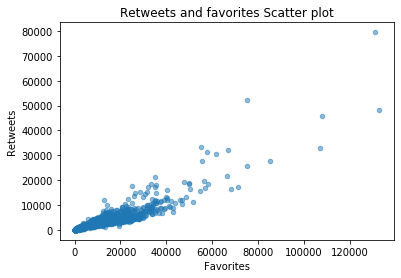

In [58]:
# create a scatterplot for retweets and favoirets
df_master.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot');

as shown in graph retweet is highly correlated with favorites with positive correlation.

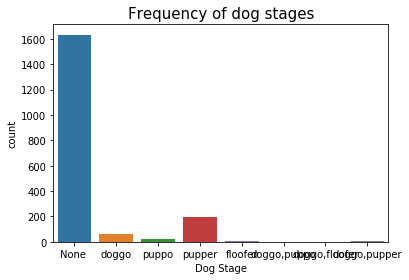

In [59]:
# create bar chart for frequency of dog stages
sns.countplot(data=df_master, x='dog_stages')
plt.title('Frequency of dog stages', size=15)
plt.xlabel('Dog Stage')
plt.savefig('dog_stages');

as shown in graph Pupper is the most frequent type.

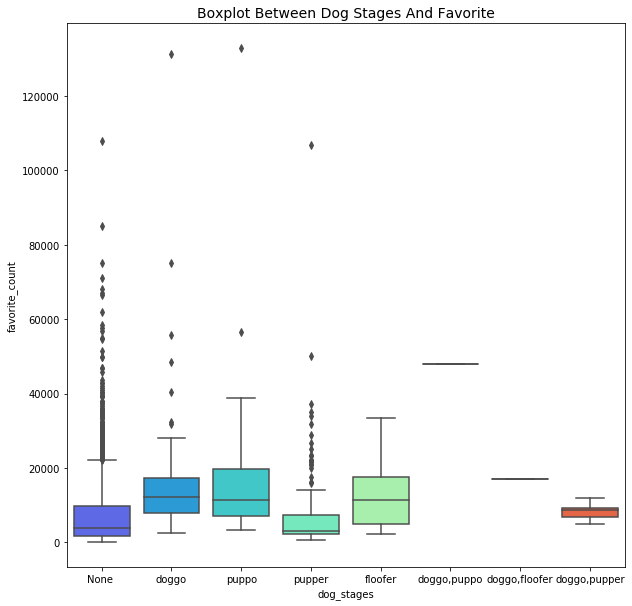

In [60]:
# create box plot between dog stages and favorite
plt.figure(figsize=(10,10))
g = sns.boxplot(x='dog_stages',y='favorite_count',data= df_master,palette='rainbow')
g.axes.set_title('Boxplot Between Dog Stages And Favorite', fontsize=14);

The Box plot shown that the Puppo has the most favorite count

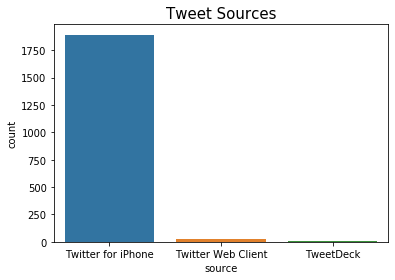

In [61]:
# create bar chart for tweet sources
sns.countplot(data=df_master, x='source')
plt.title('Tweet Sources', size=15);

The bar graph shows that Twitter for iphone has the highest count of sources.

<a id='22'></a>
### References:

https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas 

https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/

https://seaborn.pydata.org/generated/seaborn.countplot.html

https://seaborn.pydata.org/generated/seaborn.boxplot.html